In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv('../Algerian_forest_fires_dataset_UPDATE.csv', header = 1)

In [28]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [30]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

## RESTRUCTURE DATAFRAME

In [31]:
df3 = df.copy()

In [32]:
#removing whitespace from column names
df3.columns = df3.columns.str.replace(' ','')
df3.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [33]:
df3['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       nan, 'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [34]:
df3['Classes'] = df3['Classes'].str.strip()

In [35]:
df3['DC'] = df3['DC'].str.replace(' ','')

In [36]:
df3['FWI'] = df3['FWI'].str.replace(' ','')

In [37]:
df3[df3['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,fire,NaN


In [38]:
df3['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

In [39]:
df3[df3['day']=='day']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [40]:
df3.drop(df3[df3['day']=='day'].index, inplace=True)

In [41]:
df3.drop(df3[df3['day']== 'Sidi-Bel Abbes Region Dataset'].index, inplace=True)

In [42]:
df3['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [43]:
df3[df3['Classes'].isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,fire,NaN


In [44]:
df3[df3['FWI']=='fire']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,fire,NaN


In [45]:
df5 = df3.copy()

In [46]:
df5['FWI'].replace('fire',np.nan,inplace=True)

In [47]:
df5.loc[167].FWI

nan

In [48]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 36.7+ KB


In [49]:
df5 = df5.astype({"day":int,"month":int,"year":int,"Temperature":int,'RH':int,"Ws":int,"Rain":float,"FFMC":float,'DC':float,"ISI":float,"BUI":float,"FWI":float,'DMC':float})

## Dropping NA VALUE

In [50]:
df6 = df5.copy()

In [51]:
cols = [var for var in df6.columns if df6[var].isnull().mean()*100>0.03]

In [52]:
df6[cols].sample(5)

,FWI,Classes
41,0.9,not fire
245,0.5,not fire
208,26.9,fire
197,10.5,fire
63,0.8,not fire


In [53]:
new_df = df6[cols].dropna()

In [54]:
new_df

,FWI,Classes
0,0.5,not fire
1,0.4,not fire
2,0.1,not fire
3,0.0,not fire
4,0.5,not fire
...,...,...
241,6.5,fire
242,0.0,not fire
243,0.2,not fire
244,0.7,not fire


In [55]:
df6.shape, new_df.shape

((244, 14), (243, 2))

array([[<AxesSubplot:title={'center':'FWI'}>]], dtype=object)

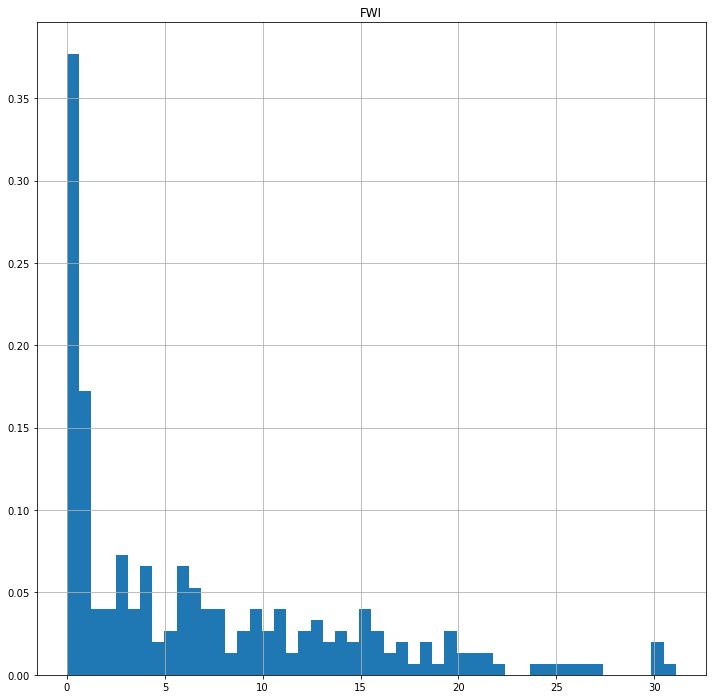

In [56]:
new_df.hist(bins=50,density=True,figsize=(12,12))

<AxesSubplot:>

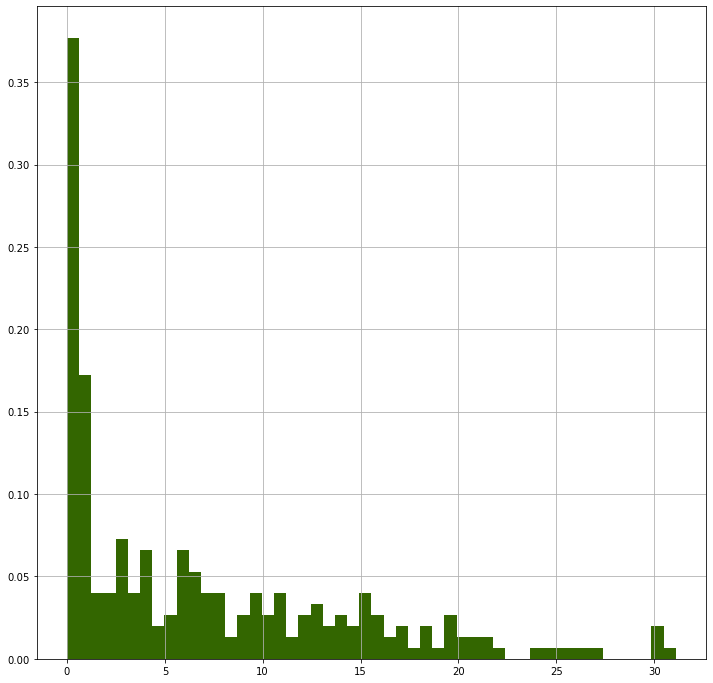

In [57]:
fig= plt.figure()
ax = fig.add_subplot(111)

df6['FWI'].hist(bins=50,ax=ax,density=True,figsize=(12,12),color='red')
new_df['FWI'].hist(bins=50,ax=ax,density=True,figsize=(12,12),color='green', alpha=0.8)

<AxesSubplot:ylabel='Density'>

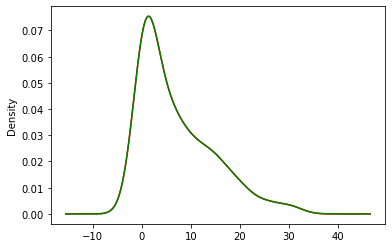

In [58]:
fig= plt.figure()
ax = fig.add_subplot(111)

df6['FWI'].plot.density(color='red')
new_df['FWI'].plot.density(color='green')

In [59]:
df6['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [60]:
temp = pd.concat([
    # % of observations per category, original data 
    df6['Classes'].value_counts()/len(df6),
    # % of observations per category, cca data 
    df6['Classes'].value_counts()/len(new_df)
],axis=1)

temp.columns=['original','cca']
temp

,original,cca
fire,0.561475,0.563786
not fire,0.434426,0.436214


## MEAN/MEDAIN IMPUTATION

In [61]:
df4 = df5.copy()
df4.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [62]:
X = df4.drop(columns=['Classes'])
y = df4['Classes']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [64]:
X_train.shape, X_test.shape

((195, 13), (49, 13))

In [65]:
X_train.isnull().mean()*100

day            0.000000
month          0.000000
year           0.000000
Temperature    0.000000
RH             0.000000
Ws             0.000000
Rain           0.000000
FFMC           0.000000
DMC            0.000000
DC             0.000000
ISI            0.000000
BUI            0.000000
FWI            0.512821
dtype: float64

In [66]:
mean_FWI = X_train['FWI'].mean()
median_FWI = X_train['FWI'].median()

In [67]:
X_train['FWI_mean'] = X_train['FWI'].fillna(mean_FWI)
X_train['FWI_median'] = X_train['FWI'].fillna(median_FWI)

/tmp/ipykernel_101202/3439803311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['FWI_mean'] = X_train['FWI'].fillna(mean_FWI)
/tmp/ipykernel_101202/3439803311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['FWI_median'] = X_train['FWI'].fillna(median_FWI)


In [68]:
X_train.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,FWI_mean,FWI_median
191,7,8,2012,34,63,13,2.9,69.7,7.2,9.8,1.2,6.9,0.6,0.6,0.6
172,19,7,2012,34,58,16,0.0,88.1,27.8,61.1,7.3,27.7,13.0,13.0,13.0
40,11,7,2012,33,76,14,0.0,81.1,8.1,18.7,2.6,8.1,2.2,2.2,2.2
176,23,7,2012,31,71,17,0.0,87.3,46.6,99.0,6.9,46.5,16.3,16.3,16.3
175,22,7,2012,32,48,18,0.0,91.5,44.2,90.1,13.2,44.0,25.4,25.4,25.4


In [69]:
print('Original FMI Variance', X_train['FWI'].var())
print('FMI Variance After mean imputation', X_train['FWI_mean'].var())
print('FMI Variance After mdeian imputation', X_train['FWI_median'].var())

Original FMI Variance 55.77235644463442
FMI Variance After mean imputation 55.48487007120847
FMI Variance After mdeian imputation 55.5132154374835


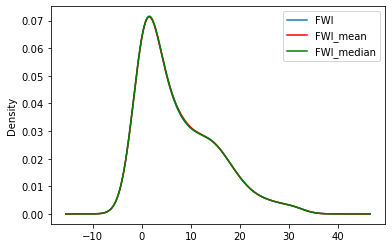

In [70]:
fig= plt.figure()
ax = fig.add_subplot(111)
X_train['FWI'].plot(kind='kde', ax= ax)
X_train['FWI_mean'].plot(kind='kde', ax= ax,color='red')
X_train['FWI_median'].plot(kind='kde', ax= ax,color='green')
#Add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels,loc='best')

In [71]:
X_train.cov()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,FWI_mean,FWI_median
day,74.661750,0.130716,0.0,1.298625,-2.585329,0.514354,-1.021409,19.795586,49.576558,199.190277,4.541959,59.302363,19.843830,19.741543,19.765096
month,0.130716,1.209886,0.0,-0.378007,-0.089215,-0.037272,0.081615,-0.391303,0.789611,7.000276,0.223711,1.248850,0.606487,0.603361,0.609265
year,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Temperature,1.298625,-0.378007,0.0,14.268729,-38.325773,-3.225773,-2.322646,36.093127,21.373608,62.221543,9.816598,22.997216,15.777728,15.696400,15.639038
RH,-2.585329,-0.089215,0.0,-38.325773,238.683743,12.106106,6.454845,-143.768676,-74.422308,-140.849925,-46.862784,-71.508255,-68.242802,-67.891035,-67.591983
Ws,0.514354,-0.037272,0.0,-3.225773,12.106106,8.465662,1.400825,-7.870579,-0.898509,6.764164,0.127732,0.197906,0.461196,0.458819,0.431039
Rain,-1.021409,0.081615,0.0,-2.322646,6.454845,1.400825,3.874976,-14.375189,-6.657969,-26.322183,-2.791567,-7.911144,-4.634757,-4.610867,-4.604646
FFMC,19.795586,-0.391303,0.0,36.093127,-143.768676,-7.870579,-14.375189,202.041932,105.448731,330.633208,45.483351,117.605519,74.753767,74.368438,74.238706
DMC,49.576558,0.789611,0.0,21.373608,-74.422308,-0.898509,-6.657969,105.448731,146.873467,486.350116,34.489134,164.321561,78.092254,77.689717,77.715334
DC,199.190277,7.000276,0.0,62.221543,-140.849925,6.764164,-26.322183,330.633208,486.350116,2127.433949,93.227414,598.158096,244.759426,243.497780,243.919625


In [72]:
X_train.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,FWI_mean,FWI_median
day,1.000000,0.013753,NaN,0.039787,-0.019367,0.020459,-0.060050,0.161175,0.473430,0.499794,0.121438,0.496536,0.306762,0.306722,0.307009
month,0.013753,1.000000,NaN,-0.090978,-0.005250,-0.011646,0.037693,-0.025028,0.059234,0.137980,0.046987,0.082142,0.073678,0.073641,0.074342
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.039787,-0.090978,NaN,1.000000,-0.656730,-0.293502,-0.312360,0.672220,0.466889,0.357125,0.600381,0.440464,0.560137,0.557853,0.555673
RH,-0.019367,-0.005250,NaN,-0.656730,1.000000,0.269316,0.212246,-0.654685,-0.397484,-0.197659,-0.700770,-0.334867,-0.593886,-0.589948,-0.587199
Ws,0.020459,-0.011646,NaN,-0.293502,0.269316,1.000000,0.244579,-0.190307,-0.025481,0.050403,0.010142,0.004921,0.021204,0.021170,0.019883
Rain,-0.060050,0.037693,NaN,-0.312360,0.212246,0.244579,1.000000,-0.513758,-0.279084,-0.289907,-0.327622,-0.290759,-0.314512,-0.314457,-0.313952
FFMC,0.161175,-0.025028,NaN,0.672220,-0.654685,-0.190307,-0.513758,1.000000,0.612137,0.504310,0.739249,0.598598,0.703428,0.702394,0.700989
DMC,0.473430,0.059234,NaN,0.466889,-0.397484,-0.025481,-0.279084,0.612137,1.000000,0.870060,0.657460,0.980959,0.860674,0.860606,0.860670
DC,0.499794,0.137980,NaN,0.357125,-0.197659,0.050403,-0.289907,0.504310,0.870060,1.000000,0.466954,0.938244,0.709776,0.708728,0.709775


<AxesSubplot:>

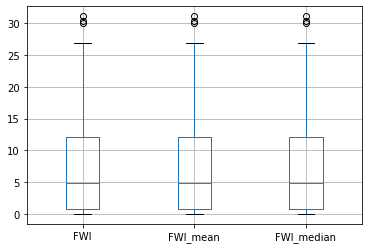

In [73]:
X_train.boxplot(['FWI','FWI_mean','FWI_median'])

## Random sample imputation

In [74]:
df7 = df5.copy()
df7.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [75]:
df7.isnull().mean()*100

day            0.000000
month          0.000000
year           0.000000
Temperature    0.000000
RH             0.000000
Ws             0.000000
Rain           0.000000
FFMC           0.000000
DMC            0.000000
DC             0.000000
ISI            0.000000
BUI            0.000000
FWI            0.409836
Classes        0.409836
dtype: float64

<AxesSubplot:>

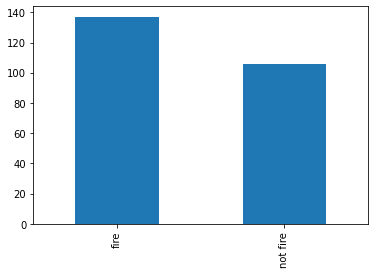

In [76]:
df7['Classes'].value_counts().sort_values(ascending=False).plot.bar()

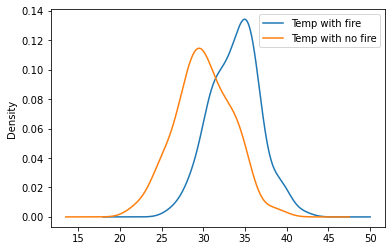

In [77]:
fig= plt.figure()
ax = fig.add_subplot(111)

df7[df7['Classes']=='fire']['Temperature'].plot(kind='kde',ax=ax)
df7[df7['Classes']=='not fire']['Temperature'].plot(kind='kde',ax=ax)
#Add legends
lines,labels = ax.get_legend_handles_labels()
labels=['Temp with fire', 'Temp with no fire']
ax.legend(lines, labels,loc='best')

In [78]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 36.7+ KB


In [79]:
X = df7.drop(columns=['Classes'])
y = df7['Classes']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [120]:
X_train['FWI_imputed'] = X_train['FWI']
X_test['FWI_imputed'] = X_test['FWI']

/tmp/ipykernel_101202/2946396772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['FWI_imputed'] = X_train['FWI']
/tmp/ipykernel_101202/2946396772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['FWI_imputed'] = X_test['FWI']


In [121]:
X_train['FWI_imputed'][X_train['FWI_imputed'].isnull()]

167   NaN
Name: FWI_imputed, dtype: float64

In [122]:
X_train['FWI'].dropna().sample(X_train['FWI'].isnull().sum())

96    1.7
Name: FWI, dtype: float64

In [123]:
X_train['FWI_imputed'][X_train['FWI_imputed'].isnull()]= X_train['FWI'].dropna().sample(X_train['FWI'].isnull().sum()).values
X_test['FWI_imputed'][X_test['FWI_imputed'].isnull()]= X_test['FWI'].dropna().sample(X_test['FWI'].isnull().sum()).values

/tmp/ipykernel_101202/86982160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['FWI_imputed'][X_train['FWI_imputed'].isnull()]= X_train['FWI'].dropna().sample(X_train['FWI'].isnull().sum()).values
/home/honey/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/tmp/ipykernel_101202/86982160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [124]:
X_train['FWI_imputed'][167]

4.9

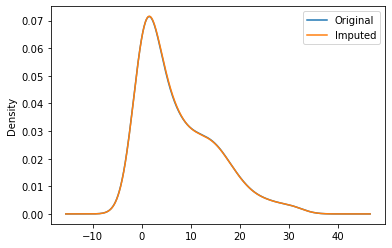

In [125]:
fig= plt.figure()
ax = fig.add_subplot(111)

X_train['FWI'].plot(kind='kde',ax=ax)
X_train['FWI_imputed'].plot(kind='kde',ax=ax)
#Add legends
lines,labels = ax.get_legend_handles_labels()
labels=['Original', 'Imputed']
ax.legend(lines, labels,loc='best')

In [126]:
print('Original FMI Variance', X_train['FWI'].var())
print('FMI Variance After imputation', X_train['FWI_imputed'].var())


Original FMI Variance 55.77235644463442
FMI Variance After imputation 55.5132154374835


In [127]:
X_train.cov()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,FWI_imputed
day,74.661750,0.130716,0.0,1.298625,-2.585329,0.514354,-1.021409,19.795586,49.576558,199.190277,4.541959,59.302363,19.843830,19.765096
month,0.130716,1.209886,0.0,-0.378007,-0.089215,-0.037272,0.081615,-0.391303,0.789611,7.000276,0.223711,1.248850,0.606487,0.609265
year,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Temperature,1.298625,-0.378007,0.0,14.268729,-38.325773,-3.225773,-2.322646,36.093127,21.373608,62.221543,9.816598,22.997216,15.777728,15.639038
RH,-2.585329,-0.089215,0.0,-38.325773,238.683743,12.106106,6.454845,-143.768676,-74.422308,-140.849925,-46.862784,-71.508255,-68.242802,-67.591983
Ws,0.514354,-0.037272,0.0,-3.225773,12.106106,8.465662,1.400825,-7.870579,-0.898509,6.764164,0.127732,0.197906,0.461196,0.431039
Rain,-1.021409,0.081615,0.0,-2.322646,6.454845,1.400825,3.874976,-14.375189,-6.657969,-26.322183,-2.791567,-7.911144,-4.634757,-4.604646
FFMC,19.795586,-0.391303,0.0,36.093127,-143.768676,-7.870579,-14.375189,202.041932,105.448731,330.633208,45.483351,117.605519,74.753767,74.238706
DMC,49.576558,0.789611,0.0,21.373608,-74.422308,-0.898509,-6.657969,105.448731,146.873467,486.350116,34.489134,164.321561,78.092254,77.715334
DC,199.190277,7.000276,0.0,62.221543,-140.849925,6.764164,-26.322183,330.633208,486.350116,2127.433949,93.227414,598.158096,244.759426,243.919625


<AxesSubplot:>

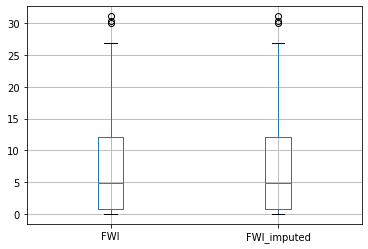

In [128]:
X_train.boxplot(['FWI','FWI_imputed'])

In [90]:
## Handling FWI missing value

In [129]:
df8 = df5.copy()
df8.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [130]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 36.7+ KB


In [131]:
df8['FWI_imputed'] = df8['FWI']

In [132]:
df8['FWI_imputed'][df8['FWI_imputed'].isnull()] = df8['FWI'].dropna().sample(df8['FWI'].isnull().sum()).values

/tmp/ipykernel_101202/747467013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['FWI_imputed'][df8['FWI_imputed'].isnull()] = df8['FWI'].dropna().sample(df8['FWI'].isnull().sum()).values


In [133]:
df8['FWI_imputed'].unique()

array([ 0.5,  0.4,  0.1,  0. ,  2.5,  7.2,  7.1,  0.3,  0.9,  5.6,  0.2,
        1.4,  2.2,  2.3,  3.8,  7.5,  8.4, 10.6, 15. , 13.9,  3.9, 12.9,
        1.7,  4.9,  6.8,  3.2,  8. ,  0.6,  3.4,  0.8,  3.6,  6. , 10.9,
        4. ,  8.8,  2.8,  2.1,  1.3,  7.3, 15.3, 11.3, 11.9, 10.7, 15.7,
        6.1,  2.6,  9.9, 11.6, 12.1,  4.2, 10.2,  6.3, 14.6, 16.1, 17.2,
       16.8, 18.4, 20.4, 22.3, 20.9, 20.3, 13.7, 13.2, 19.9, 30.2,  5.9,
        7.7,  9.7,  8.3,  0.7,  4.1,  1. ,  3.1,  1.9, 10. , 16.7,  1.2,
        5.3,  6.7,  9.5, 12. ,  6.4,  5.2,  3. ,  9.6,  4.7, 14.1,  9.1,
       13. , 17.3, 30. , 25.4, 16.3,  9. , 14.5, 13.5, 19.5, 12.6, 12.7,
       21.6, 18.8, 10.5,  5.5, 14.8, 24. , 26.3, 12.2, 18.1, 24.5, 26.9,
       31.1, 30.3, 26.1, 16. , 19.4,  2.7,  3.7, 10.3,  5.7,  9.8, 19.3,
       17.5, 15.4, 15.2,  6.5])

In [134]:
## Handling Classes missing value

In [135]:
df8['Classes_imputed'] = df8['Classes']

In [136]:
df8['Classes_imputed'][df8['Classes_imputed'].isnull()] = df8['Classes'].dropna().sample(df8['Classes'].isnull().sum()).values

/tmp/ipykernel_101202/3994612744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['Classes_imputed'][df8['Classes_imputed'].isnull()] = df8['Classes'].dropna().sample(df8['Classes'].isnull().sum()).values


In [137]:
df8.drop(columns=['FWI','Classes'], axis=1, inplace = True)

In [138]:
df8.isnull().sum()

day                0
month              0
year               0
Temperature        0
RH                 0
Ws                 0
Rain               0
FFMC               0
DMC                0
DC                 0
ISI                0
BUI                0
FWI_imputed        0
Classes_imputed    0
dtype: int64

In [139]:
df8.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI_imputed,Classes_imputed
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


## EDA

In [140]:
df9 = df8.copy()
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day              244 non-null    int64  
 1   month            244 non-null    int64  
 2   year             244 non-null    int64  
 3   Temperature      244 non-null    int64  
 4   RH               244 non-null    int64  
 5   Ws               244 non-null    int64  
 6   Rain             244 non-null    float64
 7   FFMC             244 non-null    float64
 8   DMC              244 non-null    float64
 9   DC               244 non-null    float64
 10  ISI              244 non-null    float64
 11  BUI              244 non-null    float64
 12  FWI_imputed      244 non-null    float64
 13  Classes_imputed  244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 36.7+ KB


In [141]:
df9.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI_imputed', 'Classes_imputed'],
      dtype='object')

In [142]:
df9.rename(columns={'FWI_imputed':'FWI','Classes_imputed':'classes'}, inplace = True)

In [143]:
df9

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


/home/honey/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classes', ylabel='count'>

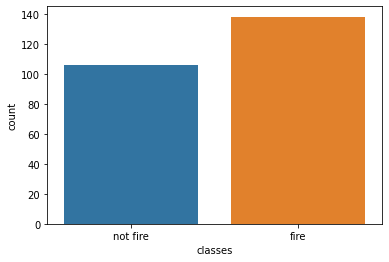

In [144]:
sns.countplot(df9['classes'])

<AxesSubplot:ylabel='classes'>

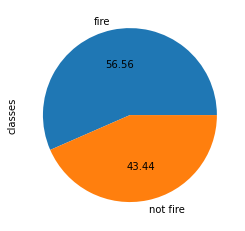

In [145]:
df9['classes'].value_counts().plot(kind='pie', autopct='%0.2f')

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>],
       [<AxesSubplot:title={'center':'FWI'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

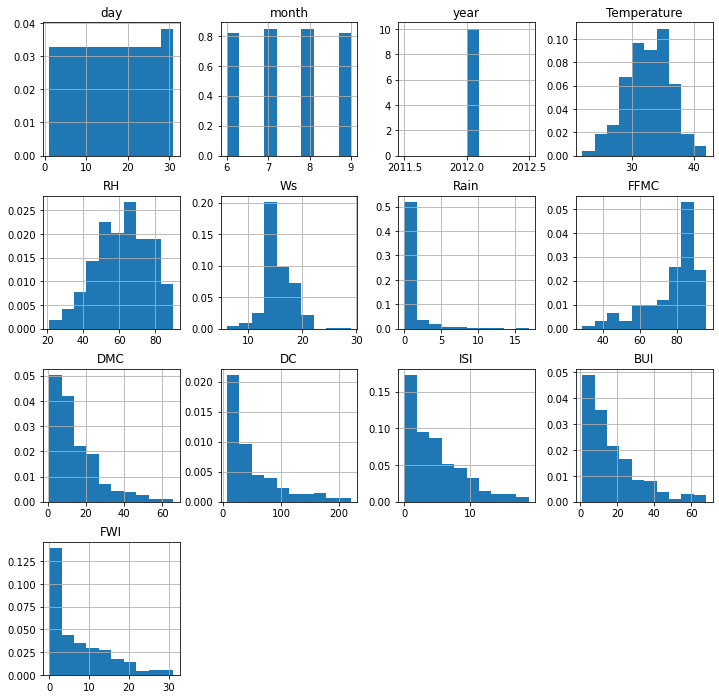

In [146]:
df9.hist( density=True, figsize=(12,12))

<AxesSubplot:ylabel='Density'>

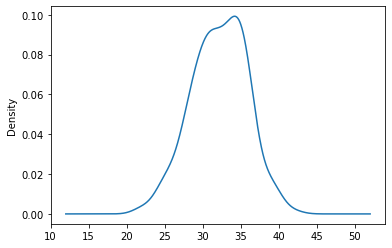

In [147]:
df9['Temperature'].plot(kind='kde')

/home/honey/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

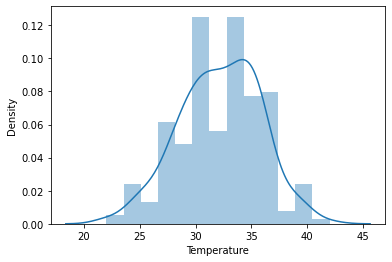

In [148]:
sns.distplot(df9['Temperature'])

/home/honey/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RH', ylabel='Density'>

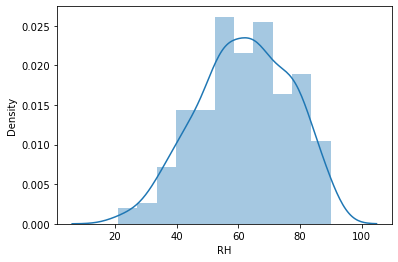

In [149]:
sns.distplot(df9['RH'])

/home/honey/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FWI', ylabel='Density'>

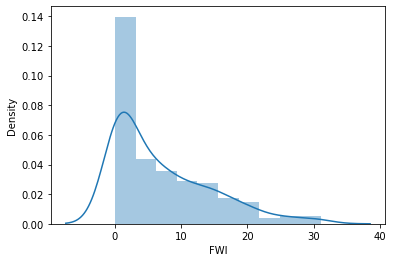

In [150]:
sns.distplot(df9['FWI'])

/home/honey/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

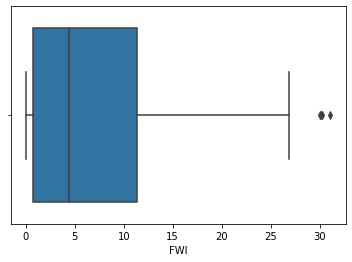

In [151]:
sns.boxplot(df9['FWI'])

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>],
       [<AxesSubplot:title={'center':'FWI'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

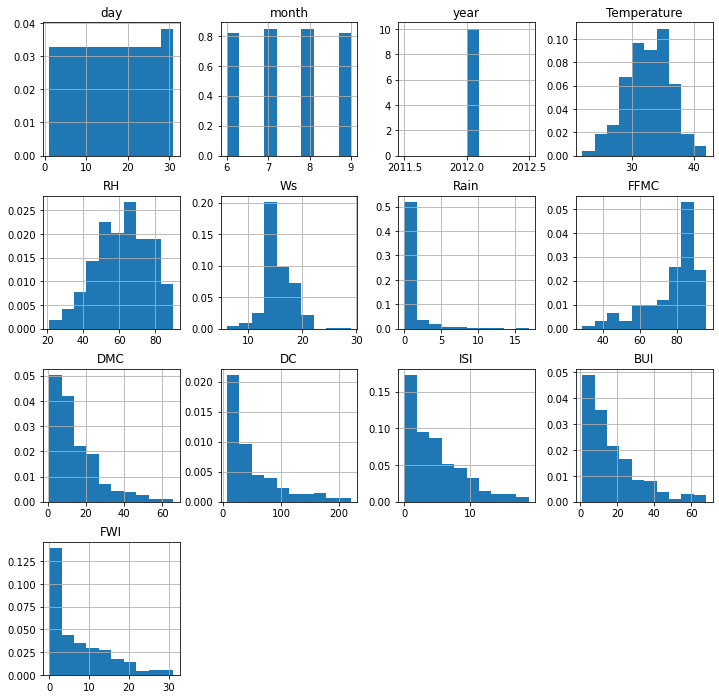

In [152]:
df9.hist( density=True, figsize=(12,12))

In [153]:
df9.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [116]:
df9.to_csv('forest_updated1')